# Clustering Exercise

In this section, we will download stock data from *Yahoo! Finance* and extract structure from variations in historical stock prices. We don't have any target values (i.e., we don't know anything about the structure in the data) which is why this is an *unsupervised* machine learning task.

## Step 1: Import Libraries

In [9]:
import datetime
import numpy as np
import pandas_datareader.data as web
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib notebook
from matplotlib import pyplot as plt

print "Libraries imported successfully!"

Libraries imported successfully!


**Note**: If the 'pandas_datareader.data as web' import fails, open your Terminal (OSX)/Command Prompt (Windows) and enter 'pip install pandas-datareader'. Once completed, execute the cell above again.

## Step 2: Configure Data Download

Let's define the time period for which we want to download the data. We also create a dictionary variable `symbol_dict` which holds the stock symbols/tickers that we want to download:

In [10]:
# Choose a starting and end time for our analysis
start = datetime.datetime(2009, 1, 1) # format is YYYY, M, DD, use datetime.timedelta(days=365*4) for moving window
end = datetime.datetime(2012, 1, 1) # format is YYYY, M, DD, use datetime.datetime.now() for moving window

# Define a list of stocks we want to investigate
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'LMT': 'Lookheed Martin',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

# Split dict into list of symbols and list of names
symbols, names = np.array(list(symbol_dict.items())).T

## Step 3: Download Stock Data From Yahoo! Finance (Requires Internet Access)

*pandas* can directly access the Yahoo! Finance API to download stock data.

We defined the date range and stock symbols in the previous step. Let's download the data and extract all opening and closing prices for each stock:

In [11]:
# Fetch the list of quotes for our symbols from Yahoo 
# (requires internet connection)
print "Downloading values for period %s - %s..." % (start, end)

quotes = [web.DataReader(symbol, 'yahoo', start, end)
          for symbol in symbols]

# Get opening price
open_vals = np.array([q["Open"] for q in quotes]).astype(np.float)

# Get closing price
close_vals = np.array([q["Close"] for q in quotes]).astype(np.float)

print "Done!"

Done!


[Help: Accessing Remote Data With Pandas](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)

## Step 4: Preprocess Data

Before we cluster the dataset, we have to convert the data to the right format. In general, data preprocessing might involve *filling missing values*, *extraction of features*, and *standardization/normalization* of data.

### Extract Features

In this example, we will use daily percent change as the feature for our clustering algorithm. Please note that *there are many other possible feature combinations* that can be used.

In the following cell, compute daily percent change (`(close_vals - open_vals) / open_vals`) and assign the result to a new variable `X`:

In [15]:
X = (close_vals - open_vals) / open_vals

**Bonus Exercise**: Experiment with other features (e.g., absolute difference) and see how it changes your results.

## Step 5: Cluster Data

The data is in the right format now. *scikit-learn* provides convenient methods to cluster complex data. We will use the popular *k-means* clustering algorithm. *k-means* is a simple, yet powerful, clustering technique to partition a data set into k distinct, non-overlapping clusters/groups.

Before we run *k-means*, we have to specify *how many clusters* the algorithm should generate.

Create a variable `n_clusters` that holds the number of clusters we want to generate (e.g., start with 12 clusters). Afterwards, create a k-means clustering object with `KMeans(n_clusters)` and assign it to a variable called `kmeans`. To generate the clusters, call the `fit` command on the clustering object. The fit `command` requires one parameter which holds the data that we want to cluster.

In [17]:
# Define the number of clusters in a variable 'n_clusters'
n_clusters = 12

# Cluster the data
kmeans = KMeans(n_clusters)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=12, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

[Help: Clustering Data With Scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

**Bonus Exercise**: Experiment with the number of clusters and observe how it changes the results.

## Step 6: Display Results

Let's combine the clustering results with the company names we specified in step 2 to visualize the clusters. Execute the code in the following cell and observe the result:

In [18]:
# Print results
labels = kmeans.labels_
for i in range(n_clusters):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: ConocoPhillips, Apple, Microsoft, Ryder, SAP, General Electrics, Sony, Amazon, Marriott, 3M, Comcast, DuPont de Nemours, Total, Caterpillar, Canon, Time Warner, Home Depot, Texas instruments, Honda, HP, Mitsubishi, Xerox, Yahoo, Cisco
Cluster 2: AIG
Cluster 3: Navistar
Cluster 4: American express
Cluster 5: Wells Fargo
Cluster 6: Pepsi, GlaxoSmithKline, Kimberly-Clark, Colgate-Palmolive, Wal-Mart, Pfizer, Novartis, Coca Cola, Sanofi-Aventis, IBM, Chevron, CVS, Walgreen, Toyota, Procter Gamble, Kellogg, Exxon, Mc Donalds, Kraft Foods, Unilever
Cluster 7: Bank of America
Cluster 8: Ford
Cluster 9: Goldman Sachs, JPMorgan Chase
Cluster 10: Cablevision
Cluster 11: Valero Energy
Cluster 12: Raytheon, Boeing, Lookheed Martin, General Dynamics, Northrop Grumman


## Step 7: Evaluate Results

### Elbow Method

The *Elbow method* can help select the optimal number of clusters. It looks at the variance explained as a function of the number of clusters. We choose the number of clusters so that when adding another cluster, it does not give significantly better modeling of the data (i.e., the "elbow").

Execute the following code to test the different clustering configurations and to visualize the results:

<IPython.core.display.Javascript object>


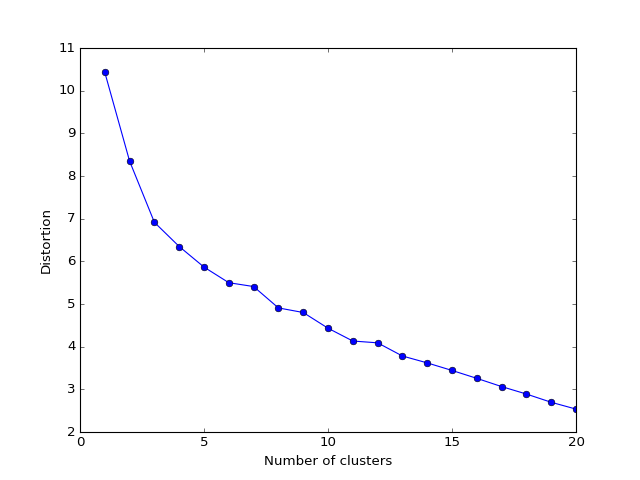

In [19]:
min_clusters = 1
max_clusters = 20
distortions = []
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot
plt.plot(range(min_clusters, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [20]:
kmeans.inertia_

3.9567003487282988

What is the optimal number of clusters?

[Help: Determining the number of clusters in a data set](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)